In [10]:
import numpy as np
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, plot_roc_curve
import warnings
warnings.filterwarnings('ignore')
import datetime
%matplotlib inline
from sklearn import metrics

# Import data

In [36]:
df = pd.read_csv("covid_data.csv")

# Feature Engineering

In [37]:
#too add to new table
df_fully_vaxed = pd.DataFrame({'location':[], 'percent_fully_vaccinated':[]})

visited_country = []
for i in range(len(df['location'])):
    if df['location'][i] in visited_country:
        continue
    selected_rows = df.loc[df['location'] == df['location'][i]]
    selected_rows.sort_values(by='date', ascending=False, inplace=True)
    selected_rows = selected_rows.dropna(subset=['people_fully_vaccinated'])
    population = selected_rows.loc[:, ['population']]
    people_fully_vaccinated = selected_rows.loc[:, ['people_fully_vaccinated']]
    max_pop =  population.max()
    max_fully_vax = people_fully_vaccinated.max()
    percent_fully_vaxed = max_fully_vax[0]/max_pop[0] *100
    visited_country.append(df['location'][i])
    df_fully_vaxed.loc[i] = {'location': df['location'][i], 'percent_fully_vaccinated': percent_fully_vaxed}
    #print(df['location'][i], ": ", percent_fully_vaxed)
    
#df_fully_vaxed = pd.DataFrame(data, index = data.keys())

In [38]:
df_fully_vaxed = df_fully_vaxed.dropna()

# Data Exploration

In [13]:
corr_matrix = df.corr().abs()
corr_matrix

corr_matrix = corr_matrix[corr_matrix > 0.5]
corr_matrix = corr_matrix[corr_matrix.index.to_list()]
corr_matrix

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
total_cases,1.000000,0.671281,0.694447,0.936471,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.614839,0.753939,NaN,NaN,NaN
new_cases,0.671281,1.000000,0.972716,0.705354,0.645232,0.632060,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.543217,NaN,NaN,NaN,NaN
new_cases_smoothed,0.694447,0.972716,1.000000,0.725595,0.639532,0.651794,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.557834,NaN,NaN,NaN,NaN
total_deaths,0.936471,0.705354,0.725595,1.000000,0.605267,0.624088,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.712860,0.926142,NaN,NaN,NaN
new_deaths,NaN,0.645232,0.639532,0.605267,1.000000,0.976632,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.685255,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
population,0.614839,0.543217,0.557834,0.712860,0.685255,0.702537,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.000000,0.746033,NaN,NaN,NaN
excess_mortality_cumulative_absolute,0.753939,NaN,NaN,0.926142,NaN,0.540006,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.746033,1.000000,NaN,NaN,NaN
excess_mortality_cumulative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.552841,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.693282
excess_mortality,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


In [39]:
#what columns using
df1_selected_columns = df[["continent","location", "total_cases", "new_cases", "hosp_patients", "icu_patients", "stringency_index","total_deaths","new_deaths","total_tests","new_tests","total_vaccinations","new_vaccinations","total_boosters"]]
df2_selected_columns = df_fully_vaxed[["location", "percent_fully_vaccinated"]]
df_merged = pd.merge(df1_selected_columns, df2_selected_columns, on="location", how="inner")

In [15]:
df_merged

,continent,location,total_cases,new_cases,hosp_patients,icu_patients,stringency_index,total_deaths,new_deaths,total_tests,new_tests,total_vaccinations,new_vaccinations,total_boosters,percent_fully_vaccinated
0,Asia,Afghanistan,5.0,5.0,NaN,NaN,8.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.606588
1,Asia,Afghanistan,5.0,0.0,NaN,NaN,8.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.606588
2,Asia,Afghanistan,5.0,0.0,NaN,NaN,8.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.606588
3,Asia,Afghanistan,5.0,0.0,NaN,NaN,8.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.606588
4,Asia,Afghanistan,5.0,0.0,NaN,NaN,8.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.606588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238229,Africa,Zimbabwe,257893.0,0.0,NaN,NaN,NaN,5606.0,0.0,NaN,NaN,NaN,NaN,NaN,29.112213
238230,Africa,Zimbabwe,257893.0,0.0,NaN,NaN,NaN,5606.0,0.0,NaN,NaN,NaN,NaN,NaN,29.112213
238231,Africa,Zimbabwe,257893.0,0.0,NaN,NaN,NaN,5606.0,0.0,NaN,NaN,NaN,NaN,NaN,29.112213
238232,Africa,Zimbabwe,257893.0,0.0,NaN,NaN,NaN,5606.0,0.0,NaN,NaN,NaN,NaN,NaN,29.112213


# Preprocessing (NA cells, location specifying)

In [40]:
Colombia = df_merged.loc[df_merged['location']  == 'Colombia']
Pakistan = df_merged.loc[df_merged['location']  == 'Pakistan']
United_States = df_merged.loc[df_merged['location']  == 'United States']
Canada = df_merged.loc[df_merged['location']  == 'Canada']
Cambodia = df_merged.loc[df_merged['location']  == 'Cambodia']
Italy = df_merged.loc[df_merged['location']  == 'Italy']
Brazil = df_merged.loc[df_merged['location']  == 'Brazil']


In [41]:
United_States = United_States[United_States['stringency_index'].notna()]
United_States = United_States[United_States['total_cases'].notna()]
United_States = United_States[United_States['total_deaths'].notna()]
United_States = United_States[United_States['total_vaccinations'].notna()]
United_States = United_States[United_States['total_boosters'].notna()]

In [42]:
Italy = Italy[Italy['stringency_index'].notna()]
Italy = Italy[Italy['total_cases'].notna()]
Italy = Italy[Italy['total_deaths'].notna()]
Italy = Italy[Italy['total_vaccinations'].notna()]
Italy = Italy[Italy['total_boosters'].notna()]


Pakistan = Pakistan[Pakistan['stringency_index'].notna()]
Pakistan = Pakistan[Pakistan['total_cases'].notna()]
Pakistan = Pakistan[Pakistan['total_deaths'].notna()]
Pakistan = Pakistan[Pakistan['total_vaccinations'].notna()]
Pakistan = Pakistan[Pakistan['total_boosters'].notna()]

In [43]:
Brazil = Brazil[Brazil['stringency_index'].notna()]
Brazil = Brazil[Brazil['total_cases'].notna()]
Brazil = Brazil[Brazil['total_deaths'].notna()]
Brazil = Brazil[Brazil['total_vaccinations'].notna()]
Brazil = Brazil[Brazil['total_boosters'].notna()]

In [44]:
Canada = Canada[Canada['stringency_index'].notna()]
Canada = Canada[Canada['total_cases'].notna()]
Canada = Canada[Canada['total_deaths'].notna()]
Canada = Canada[Canada['total_vaccinations'].notna()]
Canada = Canada[Canada['total_boosters'].notna()]

Cambodia = Cambodia[Cambodia['stringency_index'].notna()]
Cambodia = Cambodia[Cambodia['total_cases'].notna()]
Cambodia = Cambodia[Cambodia['total_deaths'].notna()]
Cambodia = Cambodia[Cambodia['total_vaccinations'].notna()]
Cambodia = Cambodia[Cambodia['total_boosters'].notna()]

Colombia = Colombia[Colombia['stringency_index'].notna()]
Colombia = Colombia[Colombia['total_cases'].notna()]
Colombia = Colombia[Colombia['total_deaths'].notna()]
Colombia = Colombia[Colombia['total_vaccinations'].notna()]
Colombia = Colombia[Colombia['total_boosters'].notna()]

# Plot

In [45]:

# X = df_merged[["gdp_per_capita", "extreme_poverty","handwashing_facilities","percent_fully_vaccinated","cont_date" ]
X = United_States[[ "total_cases","total_vaccinations","total_deaths","total_boosters"]]
Y = United_States[["stringency_index"]]


Text(0, 0.5, 'total_cases')

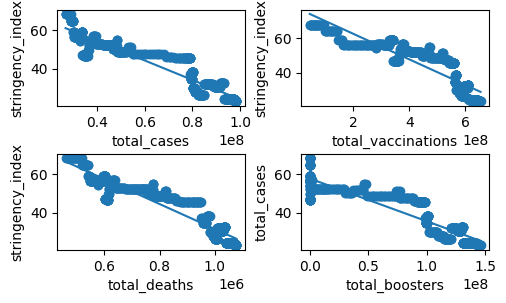

In [46]:

# plt.scatter(X,Y)
# plt.xlabel("GDP")
# plt.ylabel("human_development_index")

plt.subplot(3, 2, 1)
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.8, top=0.9, wspace=0.3, hspace=0.5)
a,b = np.polyfit(X["total_cases"],Y,1)
plt.scatter(X["total_cases"],Y)
#plt.plot(X["extreme_poverty"],Y)
plt.plot(X["total_cases"], a * X["total_cases"] + b)
plt.xlabel("total_cases")
plt.ylabel("stringency_index")

plt.subplot(3, 2, 2)
a,b = np.polyfit(X["total_vaccinations"],Y,1)
plt.scatter(X["total_vaccinations"],Y)
plt.plot(X["total_vaccinations"], a * X["total_vaccinations"] + b)
plt.xlabel("total_vaccinations")
plt.ylabel("stringency_index")

plt.subplot(3, 2, 3)
a,b = np.polyfit(X["total_deaths"],Y,1)
plt.scatter(X["total_deaths"],Y)
plt.plot(X["total_deaths"], a * X["total_deaths"] + b)
plt.xlabel("total_deaths")
plt.ylabel("stringency_index")


plt.subplot(3, 2, 4)
a,b = np.polyfit(X["total_boosters"],Y,1)
plt.scatter(X["total_boosters"],Y)
plt.plot(X["total_boosters"], a * X["total_boosters"] + b)
plt.xlabel("total_boosters")
plt.ylabel("total_cases")


# Normalization and Model Training

In [47]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)
len(X_train)

from sklearn import preprocessing
x_scaler = preprocessing.RobustScaler().fit(X_train)
X_train = x_scaler.transform(X_train)

y_scaler = preprocessing.RobustScaler().fit(y_train)
y_train = y_scaler.transform(y_train)

from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train , y_train)

y_pred = model.predict(X_train)




Text(0, 0.5, 'stringency_index')

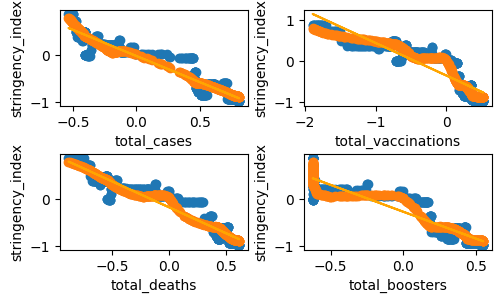

In [30]:
#a viz of the predicted vs trained data
plt.subplot(3, 2, 1)
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.8, top=0.9, wspace=0.3, hspace=0.5)
# left  = 0.125  # the left side of the subplots of the figure
# right = 0.9    # the right side of the subplots of the figure
# bottom = 0.1   # the bottom of the subplots of the figure
# top = 0.9      # the top of the subplots of the figure
# wspace = 0.2   # the amount of width reserved for blank space between subplots
# hspace = 0.2 
#plt.subplot_tool()
a,b = np.polyfit(X_train[:, 0],y_pred,1)
plt.scatter(X_train[:, 0], y_train)
plt.scatter(X_train[:, 0],y_pred)
plt.plot(X_train[:, 0], a * X_train[:, 0] + b, color="orange")
plt.xlabel("total_cases")
plt.ylabel("stringency_index")


plt.subplot(3, 2, 2)
a,b = np.polyfit(X_train[:, 1],y_pred,1)
plt.scatter(X_train[:, 1], y_train)
plt.scatter(X_train[:, 1],y_pred)
plt.plot(X_train[:, 1], a * X_train[:, 1] + b, color="orange")
plt.xlabel("total_vaccinations")
plt.ylabel("stringency_index")

plt.subplot(3, 2, 3)
a,b = np.polyfit(X_train[:, 2],y_pred,1)
plt.scatter(X_train[:, 2], y_train)
plt.scatter(X_train[:, 2],y_pred)
plt.plot(X_train[:, 2], a * X_train[:, 2] + b, color="orange")
plt.xlabel("total_deaths")
plt.ylabel("stringency_index")


plt.subplot(3, 2, 4)
a,b = np.polyfit(X_train[:, 3],y_pred,1)
plt.scatter(X_train[:, 3], y_train)
plt.scatter(X_train[:, 3],y_pred)
plt.plot(X_train[:, 3], a * X_train[:, 3] + b, color="orange")
plt.xlabel("total_boosters")
plt.ylabel("stringency_index")


# Analysis

In [31]:
print (f"Model coeficients for features {X.columns} are {model.coef_}")

Model coeficients for features Index(['total_cases', 'total_vaccinations', 'total_deaths', 'total_boosters'], dtype='object') are [[-1.07535905 -0.0581629  -0.55100567  0.61901672]]


## Model Testing: Training data


In [48]:
MSE = metrics.mean_squared_error(y_train, y_pred)
RMSE = np.sqrt(MSE)
pd.DataFrame([MSE, RMSE], index=['MSE', 'RMSE'], columns=['Metrics'])

,Metrics
MSE,0.029032
RMSE,0.170389


In [49]:
X_test = x_scaler.transform(X_test)
y_test = y_scaler.transform(y_test)
y_pred= model.predict(X_test)
X_test

array([[-0.44474964, -1.15782596, -0.63846056, -0.6249405 ],
       [ 0.45166089,  0.15877959,  0.31102113,  0.17280477],
       [ 0.72094577,  0.35573584,  0.52291473,  0.43245946],
       [-0.15600427, -0.27694898, -0.15641283, -0.34055968],
       [-0.21927048, -0.46544966, -0.30631768, -0.56547619],
       [-0.41230972, -0.77722814, -0.56098738, -0.62493923],
       [-0.09104362, -0.07786112, -0.05534458, -0.09678997],
       [-0.43429255, -1.04508674, -0.62018909, -0.62494015],
       [-0.49003088, -1.60456617, -0.72013619, -0.62494094],
       [ 0.47036275,  0.18760911,  0.38417997,  0.20423641],
       [ 0.44077576,  0.1481456 ,  0.26897218,  0.16275252],
       [ 0.01971242,  0.00498304,  0.00463049,  0.00574268],
       [-0.36861893, -0.64355323, -0.51850068, -0.6249377 ],
       [ 0.39958621,  0.1214628 ,  0.18519289,  0.13830675],
       [-0.23449364, -0.49440564, -0.34123849, -0.5929444 ],
       [-0.41584844, -0.83080273, -0.57410549, -0.62493943],
       [ 0.73978959,  0.

## Model Testing: Testing data

In [50]:
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
pd.DataFrame([MSE, RMSE], index=['MSE', 'RMSE'], columns=['Metrics'])

,Metrics
MSE,0.034813
RMSE,0.186584


In [51]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.8810601231040303

## Prediction and Interpretation

In [ ]:
y_pred

In [ ]:
y_pred = y_scaler.inverse_transform(y_pred)
y_pred